<a href="https://colab.research.google.com/github/GiuliaScarpetti/NLP_Reddit_AntiWork/blob/main/NLP_Reddit_AntiWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obiettivo del Lavoro

L’obiettivo del lavoro è analizzare il tema delle dimissioni dal posto lavoro, e le cosidette Ideologie antilavoro. 
- Gestione delle conseguenze sull'abbandono del lavoro (Identità, Morale, Economica). 
- Dimissioni dal lavoro: ragioni e mutamenti di prospettive nel mercato del lavoro;


L'analisi verrà svolta con tecniche di elaborazione naturale del linguaggio (NLP), in particolare tramite tecniche di Topic Modeling (BERTopic), che permetterà di estrarre le fondamentali motivazioni delle dimissioni da lavoro.

#Acquisione ed elaborazione dati

**Importo le librerie per l'elaborazione dati**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Carico il dataset**

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/NLP_Analysis_Giulia/reddit_posts_top_gs.xlsx") 
                                                                                    

In [ ]:
df.head()

,Unnamed: 0,id,title,score,post,num_comments,created,url
0,0.0,q82vqk,"Quit my job last night, it was nice to be home...",284219.0,Screnschoot messaggi: Good evening i was revie...,12499.0,2021-10-14 16:10:43,https://i.redd.it/ihkhc17wwft71.jpg
1,1.0,q9dwp6,Who’s the boss now?,175448.0,Screenshot messaggi: Where are you at\nYou tol...,3537.0,2021-10-16 15:12:11,https://i.redd.it/p19ixpq9wtt71.jpg
2,2.0,r5tn55,I just deleted thousands of hours of work from...,168153.0,About 3 years ago I used to work as a videogra...,13383.0,2021-11-30 18:19:42,https://www.reddit.com/r/antiwork/comments/r5t...
3,3.0,qew6bh,Never told a boss off like this. And it felt a...,136117.0,Screenshoot messaggi: Hey Brandon. We're shor...,7127.0,2021-10-24 16:58:47,https://i.redd.it/g34kzs9lifv71.jpg
4,4.0,qtvx19,"Millennials are causing a ""baby bust"" - What t...",128126.0,Tweet ricondiviso: #millennials are causing a ...,10103.0,2021-11-14 18:23:41,https://i.redd.it/wq7b4ngsslz71.png


**Controllo la dimensionalità del dataset**

In [ ]:
df.shape # (954 righe x 8 colonne)

(954, 8)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'score', 'post', 'num_comments', 'created',
       'url'],
      dtype='object')

In [ ]:
#delete duplicated variables 
del df['Unnamed: 0']

In [ ]:
df.dtypes #Tipo di dati

id                      object
title                   object
score                  float64
post                    object
num_comments           float64
created         datetime64[ns]
url                     object
dtype: object

**Controllo Missing Value**

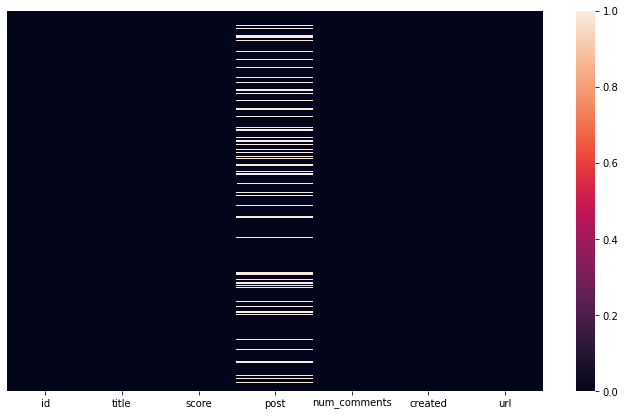

In [ ]:
plt.figure(figsize=(12,7)) #Controllo prima tramite visualizzazione
sns.heatmap(df.isnull(), yticklabels = False) # in bianco i dati mancanti

In [ ]:
df.isnull().sum() #Controllo il numero di dati mancanti per colonna

id                0
title             0
score             0
post            151
num_comments      0
created           0
url               0
dtype: int64

# Analisi Descrittiva - Introduzione al lavoro 

Il dataset riporta i dati raccolti dal [Social Network Reddit](https://www.reddit.com/r/antiwork/), e' in particolare dal sub-reddit (Gruppo) *Antiwork*, in cui si discute della possibilita' di lasciare il proprio lavoro.
> 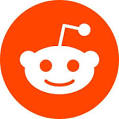
La dati raccolti riguardano la categoria "TOP" dei Post piu' votati nel sub-reddit.
La dimensione del dataset riporta 954 osservazioni (righe) per 7 variabili (colonne).
> 
I dati riportano 151 valori mancanti per la variabile "post". Per l'applicazione delle metologie di Topic Modeling, sono state impiegate diverse tecniche di pre-processing sul testo, in particolare:

*   Stopwords rimossi;
*   Simboli e spazi extra rimossi;
*   Record duplicati rimossi;
*   Missing value rimossi.

Successivamente, sono stati presi in considerazione solo i post con almeno 15 words, requisito minimo per estrarre i topic dal dataset, che ha ridotto ulteriorlmente la dimensionalita' del dataset a **783** osservazioni .



# Neural Topic modeling con la metodologia BERTopic

I topic models, sono strumenti utili per scoprire
argomenti latenti nei documenti di testo. 
Studi recenti hanno dimostrato la fattibilità dell'approccio alla modellazione degli argomenti con attività di Clustering. Rispetto ai modelli classici tra cui LDA, Non-Negative Matrix Factorization (NMF), [BERTopic](https://arxiv.org/abs/2203.05794) genera l'incorporamento di documenti (document-embedding) con modelli linguistici pre-addestrati, raggruppa gli embedding e
infine, genera rappresentazioni di argomenti (topic) con
la procedura [TF-IDF](https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530) basata su classi.

**Importo le Librerie**

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 82.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Analisi sulla colonna "post", prendo i post maggiori di 15 words
df = df[df['post'].str.len() > 15].reset_index()

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

## Data Pre-processing

In [ ]:
df.shape #New Dimensionality

(783, 8)

In [ ]:
df.head()

,index,id,title,score,post,num_comments,created,url
0,0,q82vqk,"Quit my job last night, it was nice to be home...",284219.0,Screnschoot messaggi: Good evening i was revie...,12499.0,2021-10-14 16:10:43,https://i.redd.it/ihkhc17wwft71.jpg
1,1,q9dwp6,Who’s the boss now?,175448.0,Screenshot messaggi: Where are you at\nYou tol...,3537.0,2021-10-16 15:12:11,https://i.redd.it/p19ixpq9wtt71.jpg
2,2,r5tn55,I just deleted thousands of hours of work from...,168153.0,About 3 years ago I used to work as a videogra...,13383.0,2021-11-30 18:19:42,https://www.reddit.com/r/antiwork/comments/r5t...
3,3,qew6bh,Never told a boss off like this. And it felt a...,136117.0,Screenshoot messaggi: Hey Brandon. We're shor...,7127.0,2021-10-24 16:58:47,https://i.redd.it/g34kzs9lifv71.jpg
4,4,qtvx19,"Millennials are causing a ""baby bust"" - What t...",128126.0,Tweet ricondiviso: #millennials are causing a ...,10103.0,2021-11-14 18:23:41,https://i.redd.it/wq7b4ngsslz71.png


**Importo le StopWords**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english') # Aggiungo altre StopWords analizzate nel testo
stop_words.extend(['screnschoot messaggi', 'screnschoot', 'screenshot messaggi', 'tweet ricondiviso','tweet','Tweet ricondiviso:','meme','messaggi', 'messaggio'])

**Vettorizzo le keywords ed elimino le stopwords**

In [ ]:
# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)

## Applico il Modello BERTopic

In [ ]:
# deal with df if needed
if type(df['post']) is list:
    text = df['post']
else:
    text = df['post'].tolist()

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(text)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2023-02-08 11:36:42,671 - BERTopic - Transformed documents to Embeddings
2023-02-08 11:36:55,242 - BERTopic - Reduced dimensionality
2023-02-08 11:36:55,309 - BERTopic - Clustered reduced embeddings


## Results - Data Visualization

In [ ]:
freq = model.get_topic_info()
freq.head(15)

,Topic,Count,Name
0,-1,164,-1_work_im_people_job
1,0,350,0_work_people_dont_pay
2,1,143,1_im_work_job_get
3,2,35,2_need_come_work_im
4,3,32,3_strike_workers_kelloggs_striking
5,4,19,4_sub_antiwork_people_rantiwork
6,5,15,5_covid_healthcare_hospitals_nursing
7,6,14,6_amazon_tornado_one_factory
8,7,11,7_holiday_dec_christmas_wear


**- Topic Labels -**

In [ ]:
# Generate Labels
topic_labels = model.generate_topic_labels(nr_words=3, topic_prefix=False, word_length=15, separator=" - ")
model.set_topic_labels(topic_labels)

# Create our own label
model.set_topic_labels({2: "Tax the rich"})
model.get_topic_info().head(15)

,Topic,Count,Name,CustomName
0,-1,164,-1_work_im_people_job,work - im - people
1,0,350,0_work_people_dont_pay,work - people - dont
2,1,143,1_im_work_job_get,im - work - job
3,2,35,2_need_come_work_im,Tax the rich
4,3,32,3_strike_workers_kelloggs_striking,strike - workers - kelloggs
5,4,19,4_sub_antiwork_people_rantiwork,sub - antiwork - people
6,5,15,5_covid_healthcare_hospitals_nursing,covid - healthcare - hospitals
7,6,14,6_amazon_tornado_one_factory,amazon - tornado - one
8,7,11,7_holiday_dec_christmas_wear,holiday - dec - christmas


In [ ]:
freq = model.get_topic_info()
freq.head(15)

,Topic,Count,Name,CustomName
0,-1,164,-1_work_im_people_job,work - im - people
1,0,350,0_work_people_dont_pay,work - people - dont
2,1,143,1_im_work_job_get,im - work - job
3,2,35,2_need_come_work_im,Tax the rich
4,3,32,3_strike_workers_kelloggs_striking,strike - workers - kelloggs
5,4,19,4_sub_antiwork_people_rantiwork,sub - antiwork - people
6,5,15,5_covid_healthcare_hospitals_nursing,covid - healthcare - hospitals
7,6,14,6_amazon_tornado_one_factory,amazon - tornado - one
8,7,11,7_holiday_dec_christmas_wear,holiday - dec - christmas


In [ ]:
model.visualize_barchart(top_n_topics = 9, n_words = 9)

In [ ]:
model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
model.find_topics("decision trees", top_n=1)

([6], [0.2948188015936465])

In [ ]:
model.visualize_hierarchy()

In [ ]:
model.visualize_heatmap(n_clusters=7)

In [ ]:

model.visualize_documents(
    text,
    topics=list(range(30)),
    custom_labels=True,
    height=600
)

In [ ]:
df.head()

,index,id,title,score,post,num_comments,created,url
0,0,q82vqk,"Quit my job last night, it was nice to be home...",284219.0,Screnschoot messaggi: Good evening i was revie...,12499.0,2021-10-14 16:10:43,https://i.redd.it/ihkhc17wwft71.jpg
1,1,q9dwp6,Who’s the boss now?,175448.0,Screenshot messaggi: Where are you at\nYou tol...,3537.0,2021-10-16 15:12:11,https://i.redd.it/p19ixpq9wtt71.jpg
2,2,r5tn55,I just deleted thousands of hours of work from...,168153.0,About 3 years ago I used to work as a videogra...,13383.0,2021-11-30 18:19:42,https://www.reddit.com/r/antiwork/comments/r5t...
3,3,qew6bh,Never told a boss off like this. And it felt a...,136117.0,Screenshoot messaggi: Hey Brandon. We're shor...,7127.0,2021-10-24 16:58:47,https://i.redd.it/g34kzs9lifv71.jpg
4,4,qtvx19,"Millennials are causing a ""baby bust"" - What t...",128126.0,Tweet ricondiviso: #millennials are causing a ...,10103.0,2021-11-14 18:23:41,https://i.redd.it/wq7b4ngsslz71.png


# Interpretazione Topic

*Topic 0* = resignations - the topic groups posts that mostly contain stories of negative experiences in the workplace that often result in resignation;
> 
*Topic 1* =  critique of labor - the topic groups posts that contain rather varied subjects, but which can be held together by the general idea of critique of labor and its organization in contemporary societies referring primarily to the U.S.;
> 
*Topic 2* =  work-life balance - The topic largely brings together screenshots of messages exchanged between users and the owner in which employees are asked to work at times when they had previously agreed to vacations or rest days;
> 
*Topic 3* = kellogs boycott- The topic groups posts that largely refer to the action organized by subreddit users against Kellogs' intention to hire new employees to replace those on strike;
> 
*Topic 4* = r/antiwork - the topic groups posts in which users talk about the subreddit itself, with the most frequent talks being about the resonance the channel is having outside of Reddit;
> 
*Topic 5* =  health care system and illness - the topic is about discussion of the U.S. health care system and sick leave in particular of the covid period;
>
*Topic 6* = amazon tornado - the topic refers to December 10 2021, when in Edwardsville, Illinois, a tornado destroyed a warehouse owned by Amazon in wich six company employees died during the incident;
>
*Topic 7* = Within the posts related to the topic, it does not seem possible to identify a common topic.
> 
